In [1]:
import pandas as pd

df = pd.read_pickle('df_selected_01.pkl')
df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,SalePrice
0,0.651479,0.370333,0.311725,0.351000,-0.459303,-0.793434,12.247699
1,-0.071836,-0.482512,0.311725,-0.060731,0.466465,0.257140,12.109016
2,0.651479,0.515013,0.311725,0.631726,-0.313369,-0.627826,12.317171
3,0.651479,0.383659,1.650307,0.790804,-0.687324,-0.521734,11.849405
4,1.374795,1.299326,1.650307,1.698485,0.199680,-0.045611,12.429220


In [2]:
# SalePrice를 y로, 나머지 컬럼을 X로 지정합니다.
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# 5-폴드 교차검증 수행
model = LinearRegression()

# R^2 (결정계수) 점수
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"R² 평균: {r2_scores.mean():.4f}, 표준편차: {r2_scores.std():.4f}")

# RMSE (음수로 반환되므로 부호를 바꿔줌)
rmse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -rmse_scores
print(f"RMSE 평균: {rmse_scores.mean():.4f}, 표준편차: {rmse_scores.std():.4f}")

print("\nR²(결정계수)의 평균은 모델이 타겟의 분산을 얼마나 잘 설명하는지 나타냅니다. 1에 가까울수록 설명력이 높습니다.")
print("RMSE의 평균은 예측값과 실제값 사이의 평균적인 오차 크기를 의미하며, 값이 낮을수록 예측이 정확함을 의미합니다.")


R² 평균: 0.7822, 표준편차: 0.0471
RMSE 평균: 0.1850, 표준편차: 0.0191

R²(결정계수)의 평균은 모델이 타겟의 분산을 얼마나 잘 설명하는지 나타냅니다. 1에 가까울수록 설명력이 높습니다.
RMSE의 평균은 예측값과 실제값 사이의 평균적인 오차 크기를 의미하며, 값이 낮을수록 예측이 정확함을 의미합니다.


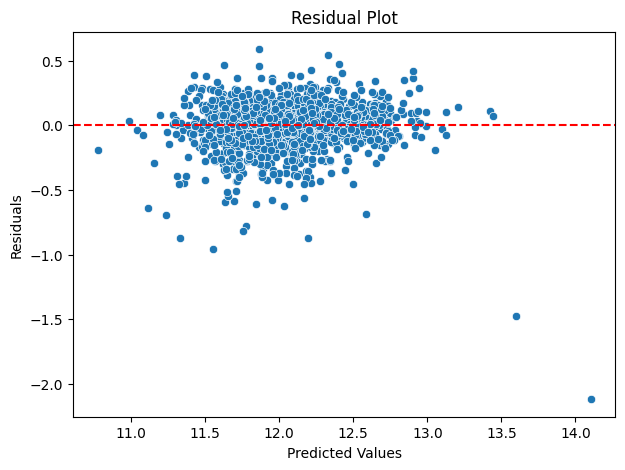

잔차 플롯은 예측값에 따라 잔차가 무작위로 분포하는지 확인하는 데 사용됩니다.
잔차가 0을 중심으로 고르게 분포하면 선형성(linearity)과 등분산성(homoscedasticity)이 만족된다고 볼 수 있습니다.
특정 패턴(곡선, 부채꼴 등)이 보인다면 선형성 또는 등분산성 가정이 위배된 것입니다.



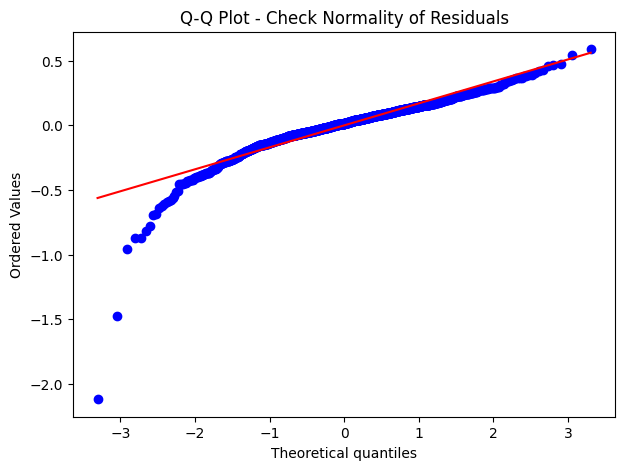

Q-Q 플롯에서 점들이 대각선에 가깝게 위치할수록 잔차가 정규분포를 따른다는 의미입니다.
만약 점들이 대각선에서 크게 벗어난다면 잔차가 정규분포를 따르지 않는다는 신호입니다.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

model.fit(X, y) 

# 예측값과 잔차 계산
y_pred = model.predict(X)
residuals = y - y_pred

# 1. 잔차 플롯 (Residual Plot)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

print("잔차 플롯은 예측값에 따라 잔차가 무작위로 분포하는지 확인하는 데 사용됩니다.")
print("잔차가 0을 중심으로 고르게 분포하면 선형성(linearity)과 등분산성(homoscedasticity)이 만족된다고 볼 수 있습니다.")
print("특정 패턴(곡선, 부채꼴 등)이 보인다면 선형성 또는 등분산성 가정이 위배된 것입니다.\n")

# 2. Q-Q 플롯 (Q-Q Plot)
plt.figure(figsize=(7, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot - Check Normality of Residuals')
plt.show()

print("Q-Q 플롯에서 점들이 대각선에 가깝게 위치할수록 잔차가 정규분포를 따른다는 의미입니다.")
print("만약 점들이 대각선에서 크게 벗어난다면 잔차가 정규분포를 따르지 않는다는 신호입니다.")




In [6]:
import statsmodels.api as sm

# statsmodels를 사용하여 OLS 회귀 모델 적합 및 summary 출력
X_const = sm.add_constant(X)  # 상수항 추가
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     937.4
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:28:35   Log-Likelihood:                 424.44
No. Observations:                1460   AIC:                            -834.9
Df Residuals:                    1453   BIC:                            -797.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0241      0.005   2533.230      

In [7]:
# 계수와 특성명을 데이터프레임으로 정리
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# 계수의 절대값 기준 내림차순 정렬
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).reset_index(drop=True)
coef_df = coef_df[['Feature', 'Coefficient']]  # 보기 좋게 컬럼 정리

print(coef_df)

print("\n계수(Coefficient)는 각 특성이 타겟값(SalePrice)에 미치는 영향의 크기와 방향을 나타냅니다.")
print("양수(+) 계수: 해당 특성의 값이 증가할수록 SalePrice가 증가함을 의미합니다.")
print("음수(-) 계수: 해당 특성의 값이 증가할수록 SalePrice가 감소함을 의미합니다.")


       Feature  Coefficient
0  OverallQual     0.178587
1    GrLivArea     0.100390
2   GarageCars     0.081355
3  TotalBsmtSF     0.051258
4     1stFlrSF     0.014559
5   GarageArea     0.008586

계수(Coefficient)는 각 특성이 타겟값(SalePrice)에 미치는 영향의 크기와 방향을 나타냅니다.
양수(+) 계수: 해당 특성의 값이 증가할수록 SalePrice가 증가함을 의미합니다.
음수(-) 계수: 해당 특성의 값이 증가할수록 SalePrice가 감소함을 의미합니다.


In [8]:
# GarageCars와 GarageArea 간의 다중공선성 확인 (VIF 계산)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산을 위해 X 데이터프레임에 상수항 추가
X_vif = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("각 변수의 VIF(분산팽창요인):")
print(vif_data)

print("\n일반적으로 VIF 값이 10을 초과하면 다중공선성이 높다고 판단합니다.")
print("GarageCars와 GarageArea의 VIF가 높게 나타난다면 두 변수 간에 강한 다중공선성이 존재함을 의미합니다.")

# 적절한 처리 제안
print("\n[처리 제안]")
print("- 두 변수 중 하나(GarageCars 또는 GarageArea)를 제거하거나,")
print("- 두 변수를 결합하여 새로운 변수(예: GarageCars당 GarageArea 평균 등)를 생성하는 방법을 고려할 수 있습니다.")
print("- 도메인 지식에 따라 더 중요한 변수를 남기는 것도 좋은 방법입니다.")


각 변수의 VIF(분산팽창요인):
       Feature       VIF
0        const  1.000000
1  OverallQual  2.170939
2    GrLivArea  1.916793
3   GarageCars  4.921049
4   GarageArea  4.850456
5  TotalBsmtSF  3.469590
6     1stFlrSF  3.659632

일반적으로 VIF 값이 10을 초과하면 다중공선성이 높다고 판단합니다.
GarageCars와 GarageArea의 VIF가 높게 나타난다면 두 변수 간에 강한 다중공선성이 존재함을 의미합니다.

[처리 제안]
- 두 변수 중 하나(GarageCars 또는 GarageArea)를 제거하거나,
- 두 변수를 결합하여 새로운 변수(예: GarageCars당 GarageArea 평균 등)를 생성하는 방법을 고려할 수 있습니다.
- 도메인 지식에 따라 더 중요한 변수를 남기는 것도 좋은 방법입니다.


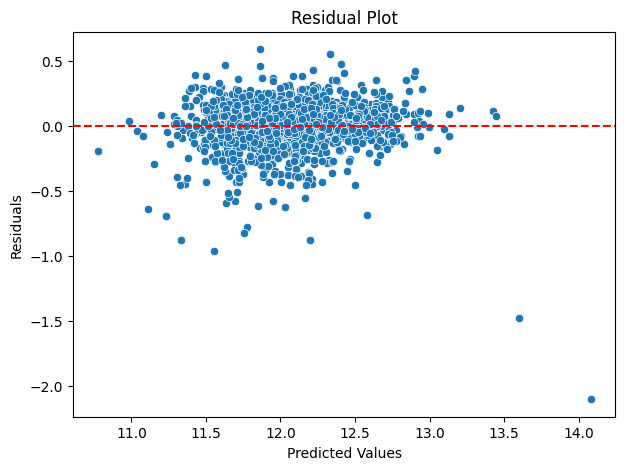

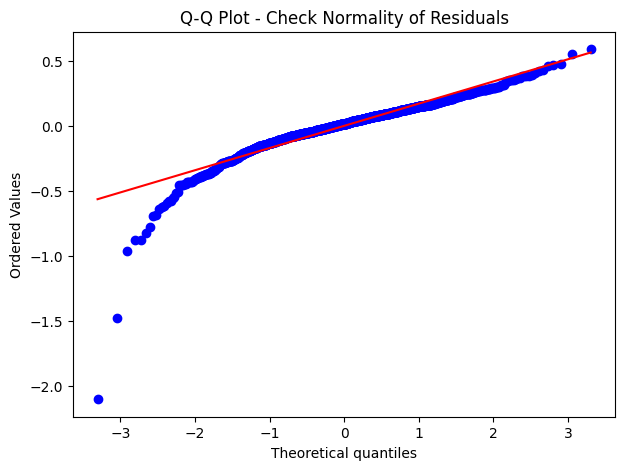

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1125.
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:28:36   Log-Likelihood:                 424.10
No. Observations:                1460   AIC:                            -836.2
Df Residuals:                    1454   BIC:                            -804.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0241      0.005   2533.514      

In [9]:
# GarageArea를 제거하고 다시 회귀 분석(X_refined_01)

X_refined_01 = df.drop(['SalePrice', 'GarageArea'], axis=1)
y = df['SalePrice']

model.fit(X_refined_01, y)

y_pred = model.predict(X_refined_01)
residuals = y - y_pred

# 1. 잔차 플롯 (Residual Plot)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# 2. Q-Q 플롯 (Q-Q Plot)
plt.figure(figsize=(7, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot - Check Normality of Residuals')
plt.show()

X_const = sm.add_constant(X_refined_01)  # 상수항 추가
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

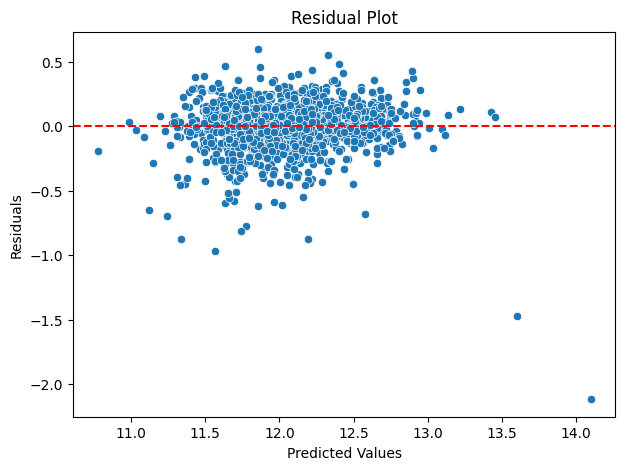

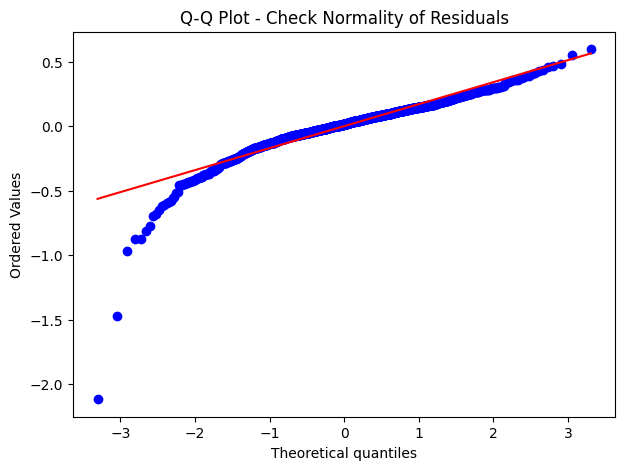

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1404.
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:28:36   Log-Likelihood:                 422.72
No. Observations:                1460   AIC:                            -835.4
Df Residuals:                    1455   BIC:                            -809.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0241      0.005   2531.991      

In [10]:
# GarageArea,1stFlrSF 를 제거하고 다시 회귀 분석(X_refined_02)

X_refined_02 = df.drop(['SalePrice', 'GarageArea','1stFlrSF'], axis=1)
y = df['SalePrice']

model.fit(X_refined_02, y)

y_pred = model.predict(X_refined_02)
residuals = y - y_pred

# 1. 잔차 플롯 (Residual Plot)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# 2. Q-Q 플롯 (Q-Q Plot)
plt.figure(figsize=(7, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot - Check Normality of Residuals')
plt.show()

X_const = sm.add_constant(X_refined_02)  # 상수항 추가
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

In [11]:
# 3가지 모델의 교차 검증 비교
from sklearn.model_selection import cross_val_score

# 원본 모델 (모든 변수)
X_original = df.drop('SalePrice', axis=1)
r2_original = cross_val_score(model, X_original, y, cv=5, scoring='r2')
rmse_original = -cross_val_score(model, X_original, y, cv=5, scoring='neg_root_mean_squared_error')

# 개선 모델 1 (GarageArea 제거)
X_refined_01 = df.drop(['SalePrice', 'GarageArea'], axis=1)
r2_refined_01 = cross_val_score(model, X_refined_01, y, cv=5, scoring='r2')
rmse_refined_01 = -cross_val_score(model, X_refined_01, y, cv=5, scoring='neg_root_mean_squared_error')

# 개선 모델 2 (GarageArea + 1stFlrSF 제거)
X_refined_02 = df.drop(['SalePrice', 'GarageArea', '1stFlrSF'], axis=1)
r2_refined_02 = cross_val_score(model, X_refined_02, y, cv=5, scoring='r2')
rmse_refined_02 = -cross_val_score(model, X_refined_02, y, cv=5, scoring='neg_root_mean_squared_error')

print("=== 교차 검증 결과 비교 ===")
print(f"원본 모델 (6개 변수):")
print(f"  R² 평균: {r2_original.mean():.4f} (±{r2_original.std():.4f})")
print(f"  RMSE 평균: {rmse_original.mean():.4f} (±{rmse_original.std():.4f})")

print(f"\n개선 모델 1 (5개 변수, GarageArea 제거):")
print(f"  R² 평균: {r2_refined_01.mean():.4f} (±{r2_refined_01.std():.4f})")
print(f"  RMSE 평균: {rmse_refined_01.mean():.4f} (±{rmse_refined_01.std():.4f})")

print(f"\n개선 모델 2 (4개 변수, GarageArea+1stFlrSF 제거):")
print(f"  R² 평균: {r2_refined_02.mean():.4f} (±{r2_refined_02.std():.4f})")
print(f"  RMSE 평균: {rmse_refined_02.mean():.4f} (±{rmse_refined_02.std():.4f})")


=== 교차 검증 결과 비교 ===
원본 모델 (6개 변수):
  R² 평균: 0.7822 (±0.0471)
  RMSE 평균: 0.1850 (±0.0191)

개선 모델 1 (5개 변수, GarageArea 제거):
  R² 평균: 0.7844 (±0.0423)
  RMSE 평균: 0.1842 (±0.0177)

개선 모델 2 (4개 변수, GarageArea+1stFlrSF 제거):
  R² 평균: 0.7842 (±0.0428)
  RMSE 평균: 0.1843 (±0.0179)


### 선형 회귀 분석 요약 및 최적 모델 선정

이번 분석에서는 주택 가격 예측을 위한 다양한 변수 조합의 선형 회귀 모델을 비교하였습니다.  
교차 검증 및 통계적 지표를 종합적으로 고려한 결과, **개선 모델 1(GarageArea 제거)**가 가장 우수한 성능과 안정성을 보였습니다.

**개선 모델 1의 주요 장점**
- 가장 높은 R²(0.7844)와 가장 낮은 RMSE(0.1842)로 예측력이 뛰어남
- 표준편차가 가장 작아 결과가 안정적임
- AIC, F-statistic 등 모델 품질 지표가 개선됨
- GarageArea 제거로 다중공선성 문제 완화(GarageCars와의 중복 해소)
- 대부분 변수의 통계적 유의성 확보(1stFlrSF만 경계선)

**개선 모델 2(GarageArea+1stFlrSF 제거)는 차선책**으로, 과도한 단순화로 인해 오히려 설명력이 소폭 감소(R² 0.7842)한 걸로 보입니다.


**결론**  
현재까지는 선형 분석 개선 모델 1이 현재 데이터와 분석 목적에 가장 부합하는 최적의 모델입니다. 추가 feature selection과 feature engineering 그리고 다른 머신 러닝 모델을 사용하여 예측력을 더 높일 수 있는지 살펴볼 예정입니다. 다음 순서로는 더 많은 피처를 선정하여 Ridge Regression model을 적용해볼 예정입니다. (->feature_selection_02.ipynb)